Méthode LOF

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import scipy.io as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score
import xlsxwriter


dataset = sp.loadmat('breastw.mat')

X = dataset['X']
y = dataset['y']

calcul_distances=['euclidean','cityblock', 'cosine', 'l1', 'l2', 'manhattan']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
workbook = xlsxwriter.Workbook('Matrice.xlsx')

#range(1,len(X_test),10)

skf= StratifiedKFold(n_splits=2,shuffle=False,random_state=None)
for train_index, test_index in skf.split(X, y):
    worksheet = workbook.add_worksheet()
    matrice=np.array([['n_neighbours','distance','contamination','F1 score','recall','precision','accuracy','AUC']])
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for k in range(1,len(X_test),10) :
        for distance in calcul_distances :
            for contam in np.linspace(0.001,0.5,15) :
                LOF = LocalOutlierFactor(n_neighbors=k, algorithm='auto', contamination=contam, metric=distance)
                y_pred = LOF.fit_predict(X_test)
                X_scores = -LOF.negative_outlier_factor_
                y=np.reshape(y,(683,))
                y_pred[y_pred>0]=0
                y_pred[y_pred<0]=1
                F1=round(f1_score(y_test,y_pred),3)
                recall=round(recall_score(y_test,y_pred),3)
                precision=round(precision_score(y_test,y_pred,zero_division=0),3)
                accuracy=round(accuracy_score(y_test,y_pred),3)
                auc=round(roc_auc_score(y_test,X_scores),3)
                matrice = np.append(matrice,np.array([k,distance,round(contam,3),F1,recall,precision,accuracy,auc]).reshape(1,8),axis=0)
    col = 0
    for row, data in enumerate(matrice):
        worksheet.write_row(row, col, data)   
workbook.close()


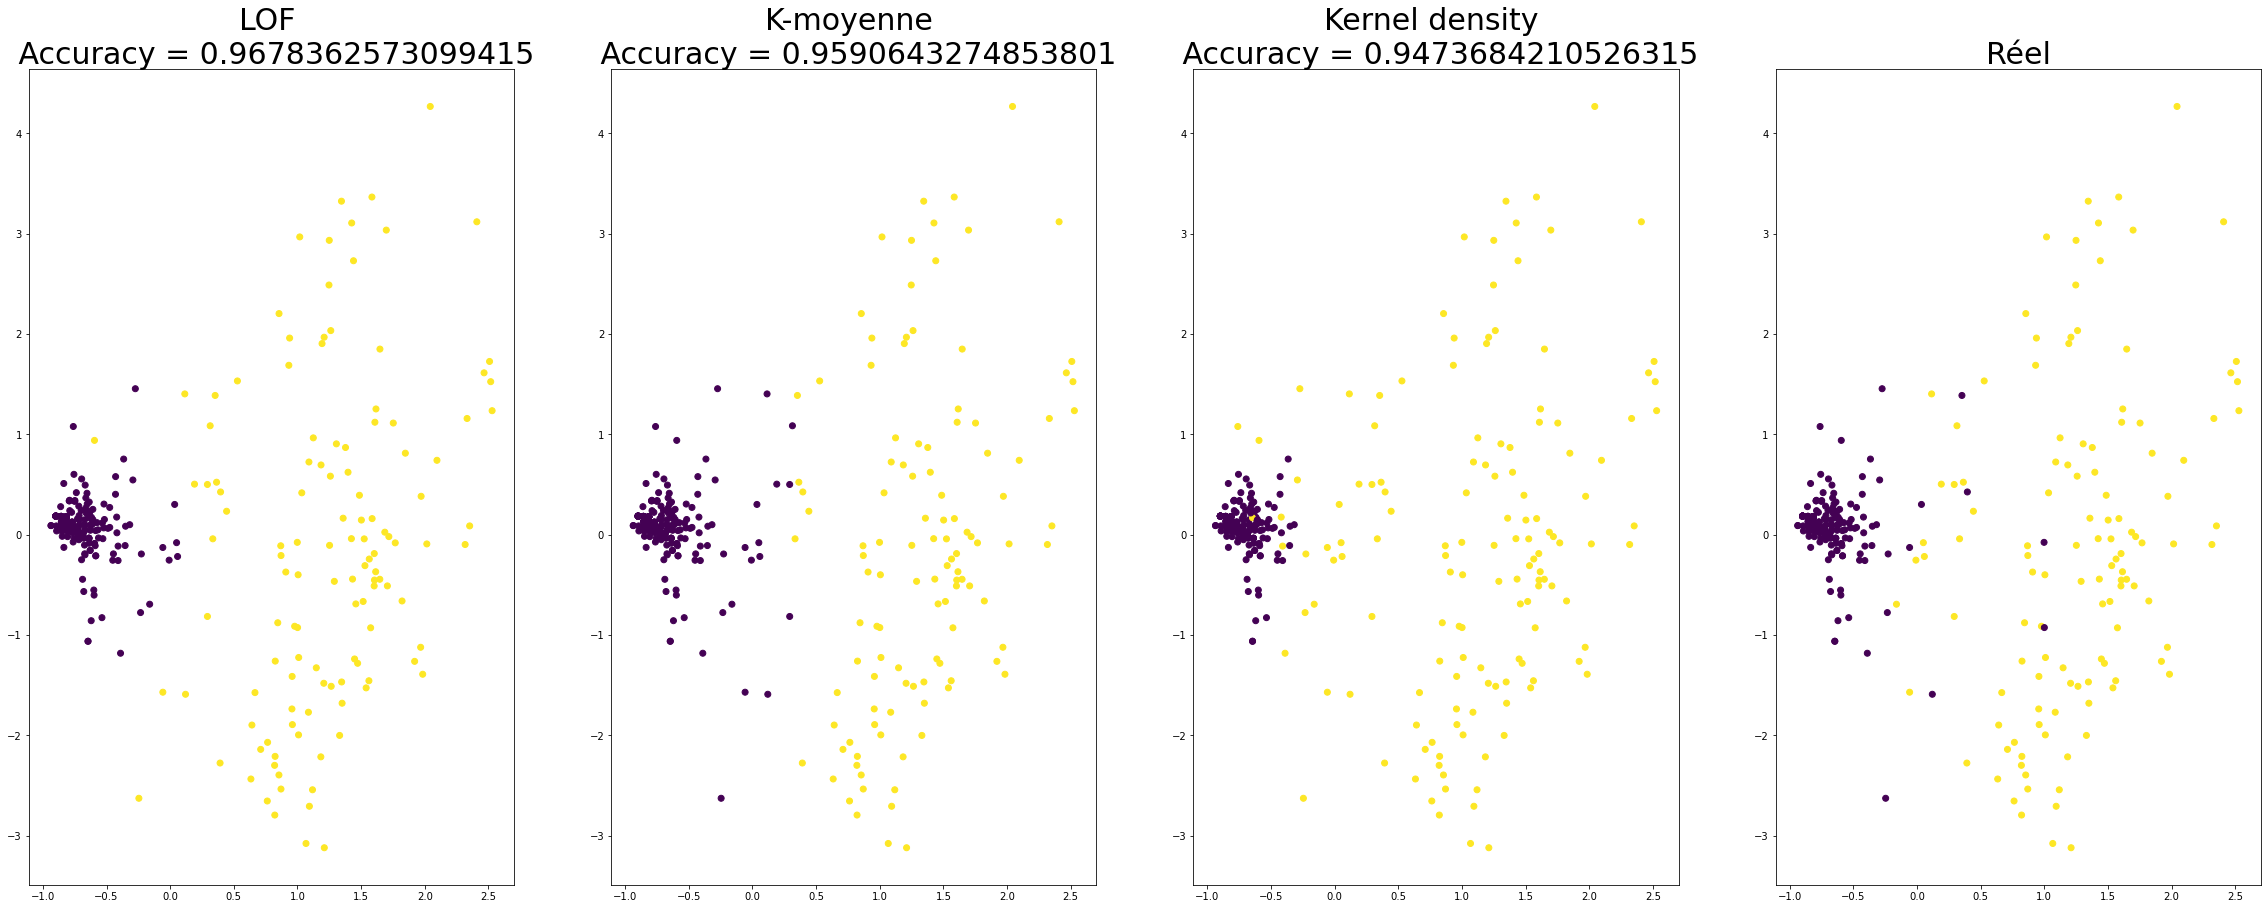

In [10]:
from sklearn.neighbors import KernelDensity
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import scipy.io as sp
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

dataset = sp.loadmat('breastw.mat')

X = dataset['X']
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)
y_test=np.reshape(y_test,(len(y_test),))

model=PCA(n_components=2)
X_2D=X_test
X_2D=model.fit_transform(X_2D)
X_2D=StandardScaler().fit_transform(X_2D)

kde = KernelDensity(kernel='gaussian', bandwidth=1).fit(X_test)
X_scores=kde.score_samples(X_test)
y_pred_kde=X_scores
y_pred_kde[y_pred_kde>-14]=0
y_pred_kde[y_pred_kde<-14]=1

kmeans = KMeans(n_clusters=2, random_state=0).fit(X_test)
y_pred_kmeans=kmeans.labels_

clf = LocalOutlierFactor(n_neighbors=200, algorithm='auto', contamination='auto', metric='euclidean')
y_pred_LOF = clf.fit_predict(X_test)
y_pred_LOF[y_pred_LOF>0]=0
y_pred_LOF[y_pred_LOF<0]=1

result_LOF = accuracy_score(y_test,y_pred_LOF)
result_kmeans = accuracy_score(y_test,y_pred_kmeans)
if result_kmeans < 0.1 :
    result_kmeans=1-result_kmeans
result_kde = accuracy_score(y_test,y_pred_kde)

plt.figure(figsize = (40, 15))
plt.subplot(1,4,1)
plt.scatter(X_2D[:,0],X_2D[:,1],c=y_pred_LOF)
plt.title("LOF \n Accuracy = {}".format(result_LOF), size=30)
plt.subplot(1,4,2)
plt.scatter(X_2D[:,0],X_2D[:,1],c=y_pred_kmeans)
plt.title("K-moyenne \n Accuracy = {}".format(result_kmeans), size=30)
plt.subplot(1,4,3)
plt.scatter(X_2D[:,0],X_2D[:,1],c=y_pred_kde)
plt.title("Kernel density \n Accuracy = {}".format(result_kde), size=30)
plt.subplot(1,4,4)
plt.scatter(X_2D[:,0],X_2D[:,1],c=y_test)
plt.title("Réel",size=30)
plt.show()


Confusion Matrix:
[[215   7]
 [  2 118]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       222
           1       0.94      0.98      0.96       120

    accuracy                           0.97       342
   macro avg       0.97      0.98      0.97       342
weighted avg       0.97      0.97      0.97       342

Accuracy : 0.9736842105263158
Model: ROC AUC=0.988


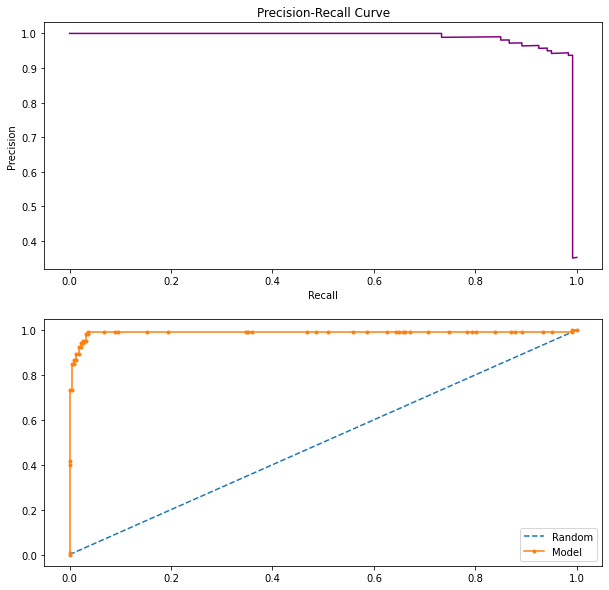

"\nskf= StratifiedKFold(n_splits=5,shuffle=True,random_state=None)\ni=1\nfor train_index, test_index in skf.split(X, y):\n    X_train, X_test = X[train_index], X[test_index]\n    y_train, y_test = y[train_index], y[test_index]\n    model_auc = roc_auc_score(y_test, X_scores)\n    # summarize score\n    print('Model: ROC AUC=%.3f' % (model_auc))\n    model_fpr, model_tpr, _ = roc_curve(y_test, X_scores)\n    # Plot the roc curve for the model and the random model line\n    plt.plot(model_fpr, model_tpr, marker='.', label='Split {}'.format(i))\n    i=i+1\nrandom_probs = [0 for _ in range(len(y_test))]\nrandom_fpr, random_tpr, _ = roc_curve(y_test, random_probs)\nplt.plot(random_fpr, random_tpr, linestyle='--', label='Random')\nplt.legend()\nplt.show()\n"

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import scipy.io as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score, confusion_matrix, classification_report
import xlsxwriter
from sklearn.metrics import precision_recall_curve

dataset = sp.loadmat('breastw.mat')

X = dataset['X']
y = dataset['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

clf = LocalOutlierFactor(n_neighbors=round(len(X_test)*0.625), algorithm='auto', contamination=0.365, metric='cityblock')
y_pred=clf.fit_predict(X_test)

y_pred = clf.fit_predict(X_test)
X_scores = -clf.negative_outlier_factor_

y=np.reshape(y,(683,))
y_pred[y_pred>0]=0
y_pred[y_pred<0]=1

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy :",result2)


precision, recall, thresholds = precision_recall_curve(y_test,X_scores)

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(recall, precision, color='purple')
ax1.set_title('Precision-Recall Curve')
ax1.set_ylabel('Precision')
ax1.set_xlabel('Recall')

random_probs = [0 for _ in range(len(y_test))]
# calculate AUC
model_auc = roc_auc_score(y_test, X_scores)
# summarize score
print('Model: ROC AUC=%.3f' % (model_auc))
# calculate ROC Curve
    # For the Random Model
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
    # For the actual model
model_fpr, model_tpr, _ = roc_curve(y_test, X_scores)
# Plot the roc curve for the model and the random model line
ax2.plot(random_fpr, random_tpr, linestyle='--', label='Random')
ax2.plot(model_fpr, model_tpr, marker='.', label='Model')
# show the legend
ax2.legend()
# show the plot
plt.show()
#print(model_fpr)
#print(model_tpr)
#print(_)

"""
skf= StratifiedKFold(n_splits=5,shuffle=True,random_state=None)
i=1
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model_auc = roc_auc_score(y_test, X_scores)
    # summarize score
    print('Model: ROC AUC=%.3f' % (model_auc))
    model_fpr, model_tpr, _ = roc_curve(y_test, X_scores)
    # Plot the roc curve for the model and the random model line
    plt.plot(model_fpr, model_tpr, marker='.', label='Split {}'.format(i))
    i=i+1
random_probs = [0 for _ in range(len(y_test))]
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
plt.plot(random_fpr, random_tpr, linestyle='--', label='Random')
plt.legend()
plt.show()
"""

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import scipy.io as sp
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score, balanced_accuracy_score

dataset = sp.loadmat('breastw.mat') # On importe le dataset 

X = dataset['X'] # On récupère les caractéristiques des points du data
y = dataset['y'] # On récupère les labels des points du dataset
y=np.reshape(y,(683,)) # On redimensionne les labels des points du dataset

calcul_distances=['euclidean','cityblock', 'cosine', 'l1', 'l2', 'manhattan'] # On définit les différences facons de calculer une distance entre deux points

skf= StratifiedKFold(n_splits=2,shuffle=False,random_state=None) # On définit notre méthode perettant de couper notre dataset en plusieurs parties
i=0 # On définit la variable i
for train_index, test_index in skf.split(X, y): 
    test =False # On définit la vraible test qui servira pour la contruction de la matrice recueillant les métriques d'analyses
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]
    for k in np.linspace(0.3,1,50) : # On fait varier notre nombre de voisins pris en faisant varier un pourcentage
        for distance in calcul_distances : # On fait varier nos différentes méthodes de calcul de distance
            for contam in np.linspace(0.001,0.5,50) : # On fait varier la contamination
                LOF = LocalOutlierFactor(n_neighbors=round(len(X_test)*k), algorithm='auto', contamination=contam, metric=distance)
                y_pred = LOF.fit_predict(X_test)
                X_scores = -LOF.negative_outlier_factor_
                # On modifie notre y_pred afin de pouvoir le comparer avec le y_test
                y_pred[y_pred>0]=0
                y_pred[y_pred<0]=1
                F1=round(f1_score(y_test,y_pred),3) # On calcul le F1 score
                recall=round(recall_score(y_test,y_pred),3) # On calcul le recall
                precision=round(precision_score(y_test,y_pred,zero_division=0),3) # On calcul la precision
                accuracy=round(accuracy_score(y_test,y_pred),3) # On calcul l'accuracy
                auc=round(roc_auc_score(y_test,X_scores),3) # On calcul l'AUC
                bal_accuracy=round(balanced_accuracy_score(y_test,y_pred),3) # On calcul le balanced accuracy
                if test == False : # Si la matrice n'a pas encore été crée alors on la crée
                    matrice = np.array([['[{},{},{}]'.format(round(k,3),distance,round(contam,3)),F1,recall,precision,accuracy,auc,bal_accuracy]])
                    test = True 
                else : # Si la matrice a été crée alors y rajoute des lignes
                    matrice = np.append(matrice,np.array(['[{},{},{}]'.format(round(k,3),distance,round(contam,3)),F1,recall,precision,accuracy,auc,bal_accuracy]).reshape(1,7),axis=0)
    if i == 0 : 
        df1=pd.DataFrame(matrice,columns=['Combinaison','F1 score','Recall','Precision','Accuracy','AUC','Balanced accuracy'])
    else :
        df2=pd.DataFrame(matrice,columns=['Combinaison','F1 score','Recall','Precision','Accuracy','AUC','Balanced accuracy'])
    i=i+1    
df1 = df1.astype({'F1 score': float, 'Recall': float,'Precision': float,'Accuracy': float,'AUC': float})
df2 = df2.astype({'F1 score': float, 'Recall': float,'Precision': float,'Accuracy': float,'AUC': float})
print(np.var(df1['F1 score']))

filtered_values_1 = np.where((df1['F1 score']>=0.93) & (df1['Recall']>=0.925) & (df1['Precision']>=0.925) & (df1['AUC']>=0.925))
filtered_values_2 = np.where((df2['F1 score']>=0.97) & (df2['Recall']>=0.97) & (df2['Precision']>=0.965) & (df2['AUC']>=0.965))
display(df1.loc[filtered_values_1].sort_values(by=['AUC'], ascending=False))
display(df2.loc[filtered_values_2].sort_values(by=['AUC'], ascending=False))


0.07223730678719542


,Combinaison,F1 score,Recall,Precision,Accuracy,AUC,Balanced accuracy
6585,"[0.6,manhattan,0.357]",0.934,0.942,0.926,0.953,0.992,0.951
6485,"[0.6,l1,0.357]",0.934,0.942,0.926,0.953,0.992,0.951
7185,"[0.629,manhattan,0.357]",0.934,0.942,0.926,0.953,0.992,0.951
7085,"[0.629,l1,0.357]",0.934,0.942,0.926,0.953,0.992,0.951
6985,"[0.629,cityblock,0.357]",0.934,0.942,0.926,0.953,0.992,0.951
6385,"[0.6,cityblock,0.357]",0.934,0.942,0.926,0.953,0.992,0.951
6285,"[0.586,manhattan,0.357]",0.934,0.942,0.926,0.953,0.992,0.951
6185,"[0.586,l1,0.357]",0.934,0.942,0.926,0.953,0.992,0.951
6085,"[0.586,cityblock,0.357]",0.934,0.942,0.926,0.953,0.992,0.951
5985,"[0.571,manhattan,0.357]",0.934,0.942,0.926,0.953,0.991,0.951


,Combinaison,F1 score,Recall,Precision,Accuracy,AUC,Balanced accuracy
6634,"[0.614,euclidean,0.347]",0.975,0.975,0.975,0.982,0.998,0.981
6834,"[0.614,l2,0.347]",0.975,0.975,0.975,0.982,0.998,0.981
7234,"[0.643,euclidean,0.347]",0.975,0.975,0.975,0.982,0.998,0.981
7434,"[0.643,l2,0.347]",0.975,0.975,0.975,0.982,0.998,0.981
6334,"[0.6,euclidean,0.347]",0.975,0.975,0.975,0.982,0.997,0.981
6534,"[0.6,l2,0.347]",0.975,0.975,0.975,0.982,0.997,0.981
6934,"[0.629,euclidean,0.347]",0.975,0.975,0.975,0.982,0.996,0.981
7134,"[0.629,l2,0.347]",0.975,0.975,0.975,0.982,0.996,0.981
6034,"[0.586,euclidean,0.347]",0.975,0.975,0.975,0.982,0.995,0.981
6234,"[0.586,l2,0.347]",0.975,0.975,0.975,0.982,0.995,0.981


In [10]:
bootstrap=pd.DataFrame({'mean_rating':[df1.sample(500,replace=True)['F1 score'].mean() for i in range(0,1000)]})
display(bootstrap)
print(bootstrap['mean_rating'].quantile(0.025),bootstrap['mean_rating'].quantile(0.975))
df1['F1 score'].mean()

,mean_rating
0,0.578448
1,0.572600
2,0.574480
3,0.570028
4,0.564796
...,...
995,0.594204
996,0.574994
997,0.590550
998,0.585842


0.5509865500000001 0.5997491999999995


0.5770572666666789

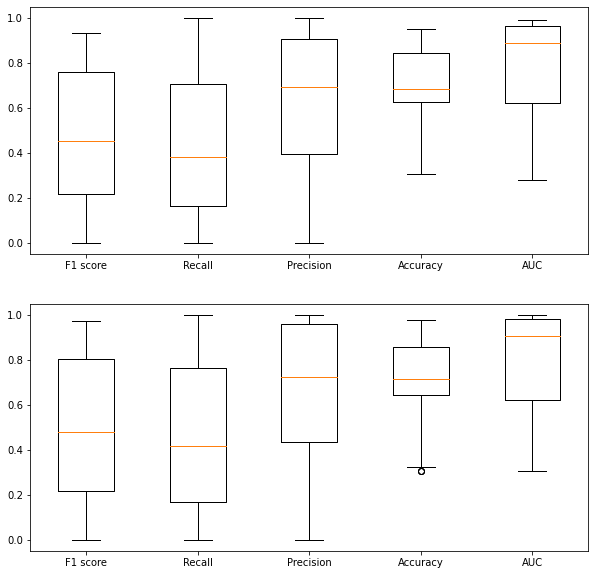

In [15]:
box_plot_data_1=[df1['F1 score'],df1['Recall'],df1['Precision'],df1['Accuracy'],df1['AUC']]
box_plot_data_2=[df2['F1 score'],df2['Recall'],df2['Precision'],df2['Accuracy'],df2['AUC']]

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.boxplot(box_plot_data_1,labels=['F1 score','Recall','Precision','Accuracy','AUC'])
ax2.boxplot(box_plot_data_2,labels=['F1 score','Recall','Precision','Accuracy','AUC'])
plt.show()

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import scipy.io as sp
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, f1_score, accuracy_score, recall_score

dataset = sp.loadmat('breastw.mat')

X = dataset['X']
y = dataset['y']
y=np.reshape(y,(683,))

K=np.array([0.5,0.514,0.543,0.571,0.6,0.629,0.643,0.25])
Distance=np.array(['cityblock','manhattan','l1','euclidean','manhattan','euclidean','l2','l2'])
Contamination=np.array([0.357,0.357,0.357,0.357,0.357,0.347,0.347,0.43])

skf= StratifiedKFold(n_splits=8,shuffle=False,random_state=None)
x=1

for i in range(0,8) :  
    test=False
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        LOF = LocalOutlierFactor(n_neighbors=round(len(X_test)*K[i]), algorithm='auto', contamination=Contamination[i], metric=Distance[i])
        y_pred = LOF.fit_predict(X_test)
        X_scores = -LOF.negative_outlier_factor_
        y_pred[y_pred>0]=0
        y_pred[y_pred<0]=1
        F1=round(f1_score(y_test,y_pred),3)
        if test == False :
            matrice = np.array([[F1]])
            test = True
        else :
            matrice = np.append(matrice,np.array([F1]).reshape(1,1),axis=0)
    if i == 0  :
        df=pd.DataFrame(matrice,columns=['[{},{},{}]'.format(K[i],Distance[i],round(Contamination[i],3))])
    else :
        df1=pd.DataFrame(matrice,columns=['[{},{},{}]'.format(K[i],Distance[i],round(Contamination[i],3))])
        df=pd.concat([df, df1], axis = 1)
display(df)
df.to_csv('test.csv')
        

,"[0.5,cityblock,0.357]","[0.514,manhattan,0.357]","[0.543,l1,0.357]","[0.571,euclidean,0.357]","[0.6,manhattan,0.357]","[0.629,euclidean,0.347]","[0.643,l2,0.347]","[0.25,l2,0.43]"
0,0.951,0.951,0.951,0.918,0.951,0.900,0.900,0.687
1,0.984,0.984,0.951,0.918,0.951,0.933,0.900,0.657
2,0.852,0.852,0.918,0.951,0.918,0.933,0.933,0.215
3,0.949,0.949,0.949,0.983,0.949,0.949,0.966,0.242
4,0.967,0.967,0.967,0.967,0.967,0.967,0.967,0.627
5,0.967,0.967,0.967,0.967,0.967,0.967,1.000,0.388
6,0.967,0.967,0.967,0.967,0.967,0.967,0.967,0.328
7,0.967,0.967,0.967,0.967,1.000,1.000,0.967,0.418


In [19]:
from scipy import stats
from scipy.stats import f_oneway

print(stats.kruskal(df['[0.6,manhattan,0.357]'], df['[0.514,manhattan,0.357]']))
print(stats.kruskal(df['[0.6,manhattan,0.357]'], df['[0.25,l2,0.43]']))


KruskalResult(statistic=0.027261712439424844, pvalue=0.8688564479684447)
KruskalResult(statistic=11.37777777777778, pvalue=0.0007432798688492081)
